<a href="https://colab.research.google.com/github/15021996/IPL_DataAnalysis/blob/main/Soumya_Team_3_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [2]:
#Import package
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
matches_df = pd.read_csv(working_directory + 'matches.csv')

In [5]:
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
matches_df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


We can infer following information from the above operation describe().
1. The biggest win by runs is by 146 runs.
2. The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.
3. 75% of the victorious teams that bat first won by a margin of 19 runs.
4. 75% of the victorious teams that bat second won by a margin of 6 wickets.

* To know null values in the dataframe.

In [8]:
matches_df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

1. Which city maximum matches were played?

In [9]:

matches_df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Ranchi              7
Abu Dhabi           7
Cape Town           7
Port Elizabeth      7
Cuttack             7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

Maximun number of matches were played in Mumbai.

2.The Number of matches played in each season?

In [10]:
matches_df['Season'].value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2016    60
IPL-2014    60
IPL-2018    60
IPL-2019    60
IPL-2015    59
IPL-2017    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

The maximum matches played is in the year 2013 because there are 9 teams participated in this year.The least number of matches played is 57 in the year 2009.


3.Match Winners based on Year?

In [11]:
teams_per_season = matches_df.groupby('Season')['winner'].value_counts()
teams_per_season

Season    winner                     
IPL-2008  Rajasthan Royals               13
          Kings XI Punjab                10
          Chennai Super Kings             9
          Delhi Daredevils                7
          Mumbai Indians                  7
                                         ..
IPL-2019  Kings XI Punjab                 6
          Kolkata Knight Riders           6
          Sunrisers Hyderabad             6
          Rajasthan Royals                5
          Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [12]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():
  print(items)
  extract_year = items[0][0].split('-')    
  if int(extract_year[1])==year:
    print(items[0][0])
    win_series = {
            'year': items[0][0],
            'team': items[0][1],
            'wins': items[1]}
    win_per_season_df = win_per_season_df.append(win_series,ignore_index=True)
    year = year + 1

(('IPL-2008', 'Rajasthan Royals'), 13)
IPL-2008
(('IPL-2008', 'Kings XI Punjab'), 10)
(('IPL-2008', 'Chennai Super Kings'), 9)
(('IPL-2008', 'Delhi Daredevils'), 7)
(('IPL-2008', 'Mumbai Indians'), 7)
(('IPL-2008', 'Kolkata Knight Riders'), 6)
(('IPL-2008', 'Royal Challengers Bangalore'), 4)
(('IPL-2008', 'Deccan Chargers'), 2)
(('IPL-2009', 'Delhi Daredevils'), 10)
IPL-2009
(('IPL-2009', 'Deccan Chargers'), 9)
(('IPL-2009', 'Royal Challengers Bangalore'), 9)
(('IPL-2009', 'Chennai Super Kings'), 8)
(('IPL-2009', 'Kings XI Punjab'), 7)
(('IPL-2009', 'Rajasthan Royals'), 6)
(('IPL-2009', 'Mumbai Indians'), 5)
(('IPL-2009', 'Kolkata Knight Riders'), 3)
(('IPL-2010', 'Mumbai Indians'), 11)
IPL-2010
(('IPL-2010', 'Chennai Super Kings'), 9)
(('IPL-2010', 'Deccan Chargers'), 8)
(('IPL-2010', 'Royal Challengers Bangalore'), 8)
(('IPL-2010', 'Delhi Daredevils'), 7)
(('IPL-2010', 'Kolkata Knight Riders'), 7)
(('IPL-2010', 'Rajasthan Royals'), 6)
(('IPL-2010', 'Kings XI Punjab'), 4)
(('IPL-2011'

In [13]:
win_per_season_df

,year,team,wins
0,IPL-2008,Rajasthan Royals,13
1,IPL-2009,Delhi Daredevils,10
2,IPL-2010,Mumbai Indians,11
3,IPL-2011,Chennai Super Kings,11
4,IPL-2012,Kolkata Knight Riders,12
5,IPL-2013,Mumbai Indians,13
6,IPL-2014,Kings XI Punjab,12
7,IPL-2015,Chennai Super Kings,10
8,IPL-2016,Sunrisers Hyderabad,11
9,IPL-2017,Mumbai Indians,12


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


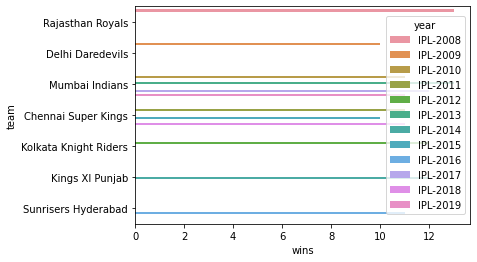

In [14]:
sns.barplot('wins', 'team', hue='year', data=win_per_season_df);

From the barplot, we can easily make inferences regarding the year in which a particular team has scored the maximum wins(and also the number of wins).

Observations:
Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

In [15]:
venue_ser = matches_df['venue'].value_counts()

In [16]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

In [17]:
venue_df

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


There are total 40 venues.

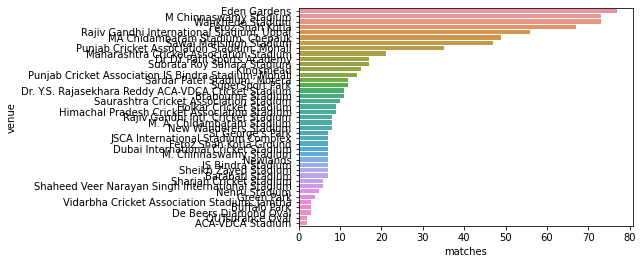

In [18]:

sns.barplot(x='matches', y='venue', data=venue_df);
sns.set(rc={'figure.figsize':(20.7,8.27)})

*Eden Gardens has hosted the maximum number of IPL matches


4.The player who has won the player_of_match title on most occasions is the most valuable player.



In [21]:
man_of_the_match_ser = matches_df['player_of_match'].value_counts()
man_of_the_match_ser

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
                  ..
MF Maharoof        1
J Theron           1
KV Sharma          1
S Gill             1
K Rabada           1
Name: player_of_match, Length: 226, dtype: int64

In [23]:
man_of_the_match_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in man_of_the_match_ser.iteritems():
    if count>10:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        man_of_the_match_df = man_of_the_match_df.append(temp_df2, ignore_index=True)
        count += 1

In [24]:
man_of_the_match_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,MS Dhoni,17
4,RG Sharma,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


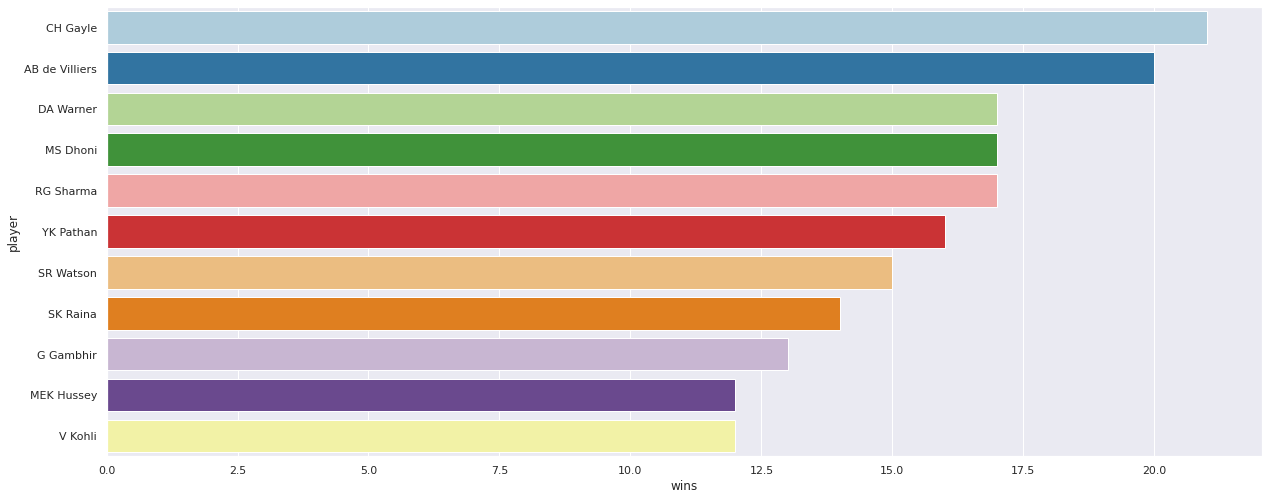

In [25]:
sns.barplot(x='wins', y='player', data=man_of_the_match_df, palette='Paired');

Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.

In [29]:
working_directory = '/content/drive/My Drive/AlmaBetter/CohortAravali/Cohort Aravali/Module 2/Capstone-1/'
Players_df = pd.read_excel(working_directory + 'Players.xlsx')

In [30]:
Players_df.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [31]:
Players_df.tail()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India
564,YV Takawale,1984-11-05,Right_Hand,NaN,India
565,Z Khan,1978-10-07,Right_Hand,Left-arm fast-medium,India


In [41]:
Players_df['Player_Name'].unique()

array(['A Ashish Reddy', 'A Chandila', 'A Chopra', 'A Choudhary',
       'A Dananjaya', 'A Flintoff', 'A Hales', 'A Joseph', 'A Kumble',
       'A Mishra', 'A Mithun', 'A Mukund', 'A Nehra', 'A Nel', 'A Roy',
       'A Singh', 'A Symonds', 'A Turner', 'A Uniyal', 'A Zampa',
       'AA Bilakhia', 'AA Chavan', 'AA Jhunjhunwala', 'AA Kazi',
       'AA Noffke', 'AB Agarkar', 'AB Barath', 'AB de Villiers',
       'AB Dinda', 'AB McDonald', 'Abdur Razzak', 'AC Blizzard',
       'AC Gilchrist', 'AC Thomas', 'AC Voges', 'AD Mascarenhas',
       'AD Mathews', 'AD Nath', 'AD Russell', 'AF Milne', 'AG Murtaza',
       'AG Paunikar', 'AJ Finch', 'AJ Tye', 'AL Menaria', 'AM Nayar',
       'AM Rahane', 'AM Salvi', 'AN Ahmed', 'AN Ghosh', 'Anand Rajan',
       'Anirudh Singh', 'Ankit Sharma', 'Ankit Soni', 'Anureet Singh',
       'AP Dole', 'AP Majumdar', 'AP Tare', 'AR Bawne', 'AR Patel',
       'AS Rajpoot', 'AS Raut', 'AS Yadav', 'AT Rayudu', 'AUK Pathan',
       'AV Wankhade', 'Avesh Khan', 'Azha

In [45]:
print(Players_df.loc[Players_df['Player_Name'] == 'CH Gayle'])

    Player_Name        DOB Batting_Hand       Bowling_Skill      Country
102    CH Gayle 1979-09-21    Left_Hand  Right-arm offbreak  West Indies


From above two operations we can conclude that Cris Gayle who has been Player of teh match for most of the matches if Left handed ,age is 41 years old and hails from West Indies.



In [ ]:
This is sample line